<a href="https://colab.research.google.com/github/redframelbx/datascience/blob/main/machine%20learning/customer_classification_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

read dataset

In [18]:
data = pd.read_csv('/content/sample_data/Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [19]:
data.isna().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

drop

In [20]:
data.drop('Customer Id', axis=1, inplace=True)


In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              700 non-null    int64  
 1   Edu              700 non-null    int64  
 2   Years Employed   700 non-null    int64  
 3   Income           700 non-null    int64  
 4   Card Debt        700 non-null    float64
 5   Other Debt       700 non-null    float64
 6   Defaulted        700 non-null    float64
 7   Address          700 non-null    object 
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 54.7+ KB


In [23]:
data.shape

(700, 9)

In [24]:
data.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['Address']
for i in col:
  data[i] = encoder.fit_transform(data[i])

data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,1,6.3
1,47,1,26,100,4.582,8.218,0.0,21,12.8
2,33,2,10,57,6.111,5.802,1.0,13,20.9
3,29,2,4,19,0.681,0.516,0.0,9,6.3
4,47,1,31,253,9.308,8.908,0.0,8,7.2
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,11,4.4
846,28,2,7,34,0.359,2.021,0.0,2,7.0
847,25,4,0,18,2.802,3.210,1.0,1,33.4
848,32,1,12,28,0.116,0.696,0.0,12,2.9


create model and fit and plot


In [26]:
from sklearn.cluster import KMeans
k_values = range(2,10)
inertia = []
for i in k_values:
  kmean = KMeans(init='k-means++' , n_clusters=i , n_init=10)
  kmean.fit(data)
  labels = kmean.labels_
  inertia.append(kmean.inertia_)

Text(0, 0.5, 'Inertia')

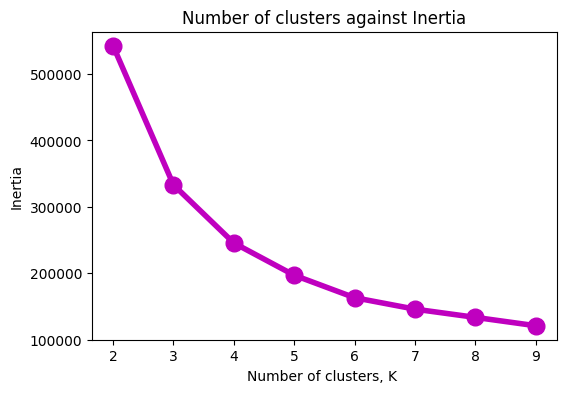

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia,"o-m", linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia", fontsize=12)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

In [28]:
final_labels = kmean.labels_
data['Label'] = final_labels
data

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Label
0,41,2,6,19,0.124,1.073,0.0,1,6.3,1
1,47,1,26,100,4.582,8.218,0.0,21,12.8,7
2,33,2,10,57,6.111,5.802,1.0,13,20.9,8
3,29,2,4,19,0.681,0.516,0.0,9,6.3,1
4,47,1,31,253,9.308,8.908,0.0,8,7.2,2
...,...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,11,4.4,6
846,28,2,7,34,0.359,2.021,0.0,2,7.0,6
847,25,4,0,18,2.802,3.210,1.0,1,33.4,1
848,32,1,12,28,0.116,0.696,0.0,12,2.9,6


groupby label

In [29]:
data.groupby(['Label']).mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Label,,,,,,,,,
0,41.250000,1.861111,14.625000,76.013889,2.858806,5.566778,0.208333,10.875000,11.138889
1,27.472222,1.611111,3.231481,21.504630,0.753097,1.536315,0.370370,3.967593,10.575463
2,46.666667,2.333333,20.166667,236.500000,7.760333,14.913667,0.333333,14.000000,9.816667
3,42.149425,1.678161,5.356322,28.586207,1.020897,2.115540,0.275862,15.045977,11.188506
4,43.900000,3.000000,18.400000,164.800000,3.356000,9.300100,0.100000,17.200000,7.800000
5,43.000000,4.000000,18.000000,446.000000,16.031000,12.959000,1.000000,14.000000,6.500000
6,32.354430,1.677215,7.981013,35.879747,0.964203,2.156854,0.202532,5.746835,8.598101
7,43.666667,1.972222,19.972222,111.666667,3.985778,6.502167,0.111111,12.666667,9.272222
8,38.464912,1.701754,11.859649,53.631579,2.089386,3.980088,0.210526,10.552632,11.289474


export to csv

In [30]:
data.to_csv('customerclassification.csv')

In [31]:
cust_w_g1 = data[data.Label==1]
cust_w_g1

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio,Label
0,41,2,6,19,0.124,1.073,0.0,1,6.3,1
3,29,2,4,19,0.681,0.516,0.0,9,6.3,1
12,24,1,7,18,0.526,0.643,0.0,0,6.5,1
14,28,3,2,20,0.233,1.647,1.0,0,9.4,1
16,29,1,1,17,0.132,0.293,0.0,4,2.5,1
...,...,...,...,...,...,...,...,...,...,...
836,23,2,3,24,0.552,0.960,0.0,4,6.3,1
837,23,1,7,22,0.849,2.319,0.0,3,14.4,1
838,26,1,10,25,1.306,0.469,0.0,1,7.1,1
839,31,1,8,22,0.370,1.104,0.0,1,6.7,1


In [32]:
# !pip install kneed
# from kneed import KneeLocator
# k_value = range(2,6)

# inertia = []
# kl = KneeLocator(k_values, inertia, curve="convex", direction='decreasing')
# kl.elbow